In [ ]:
import tensorflow as tf
print(tf.__version__)
print(tf.keras.__version__)
import matplotlib.pyplot as ply
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras import layers, regularizers

import os
import zipfile

2.9.2
2.9.0


**IMPORTING THE IMAGES**

In [ ]:
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
local_zip ="/content/drive/MyDrive/rps.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
print(type(zip_ref))
zip_ref.extractall('/tmp/rps/')
zip_ref.close()

<class 'zipfile.ZipFile'>


In [ ]:
local_zip ="/content/drive/MyDrive/rps-test-set.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
print(type(zip_ref))
zip_ref.extractall('/tmp/rps_test/')
zip_ref.close()

<class 'zipfile.ZipFile'>


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255


train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [ ]:
train_dir='/tmp/rps/rps'
test_dir='/tmp/rps_test/rps-test-set'
paper='paper/'

**FIRST PAPER IMAGE IN DIRECTORY**

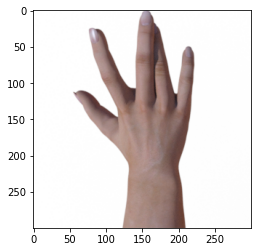

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.imshow(mpimg.imread('/tmp/rps/rps/paper/paper01-000.png'))

**FIRST ROCK IMAGE IN DIRECTORY**

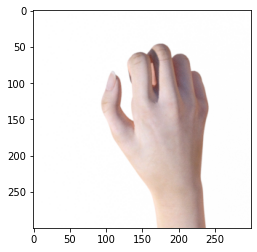

In [ ]:
plt.imshow(mpimg.imread('/tmp/rps/rps/rock/rock01-000.png'))

**FIRST SCISSOR IMAGE IN DIRECTORY**

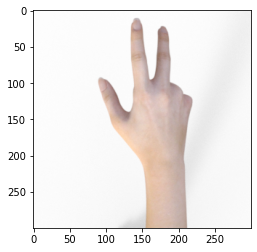

In [ ]:
plt.imshow(mpimg.imread('/tmp/rps/rps/scissors/scissors01-000.png'))

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(64, 64),  # All images will be resized to 224x224
        batch_size=15,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical',
        subset='training'
)

Found 2016 images belonging to 3 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=15,
    class_mode='categorical',
    subset='validation'
)

Found 504 images belonging to 3 classes.


In [ ]:
test_generator = train_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=15,
    class_mode='categorical',
    shuffle=False
)

Found 372 images belonging to 3 classes.


**FIRST CNN NETWORK**

a. Build a CNN model with the following specifications:

-- Input shape must be 64 x 64.

-- No of filters in the first convolution layer = 64, Kernel size = 3 x 3

-- No. of filters in the second convolution layer = 32, kernel size = 3 x 3 

-- No of filters in the third convolution layer = 16, kernel size = 3 x 3

-- Use one fully connected layer with 128 neurons.

-- Use a max pooling layer after each convolution layer.

-- Use ReLu as activation function in the convolution and fully connected layers.

-- Assume the remaining parameters t

In [ ]:
model=tf.keras.Sequential()
model.add(tf.keras.Input(shape=(64, 64, 3)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu", name="conv1"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=2, name="maxpool1"))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu", name="conv2"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=2, name="maxpool2"))
model.add(tf.keras.layers.Conv2D(16, kernel_size=(3,3), activation="relu", name="conv3"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=2, name="maxpool3"))
model.add(tf.keras.layers.Flatten(name="flatten"))
model.add(tf.keras.layers.Dense(128, activation="relu", name="Fully_Connected_1"))
model.add(tf.keras.layers.Dense(3, activation="softmax", name="Output_Layer"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 62, 62, 64)        1792      
                                                                 
 maxpool1 (MaxPooling2D)     (None, 30, 30, 64)        0         
                                                                 
 conv2 (Conv2D)              (None, 28, 28, 32)        18464     
                                                                 
 maxpool2 (MaxPooling2D)     (None, 13, 13, 32)        0         
                                                                 
 conv3 (Conv2D)              (None, 11, 11, 16)        4624      
                                                                 
 maxpool3 (MaxPooling2D)     (None, 5, 5, 16)          0         
                                                                 
 flatten (Flatten)           (None, 400)               0

**CNN ARCHITECTURE**

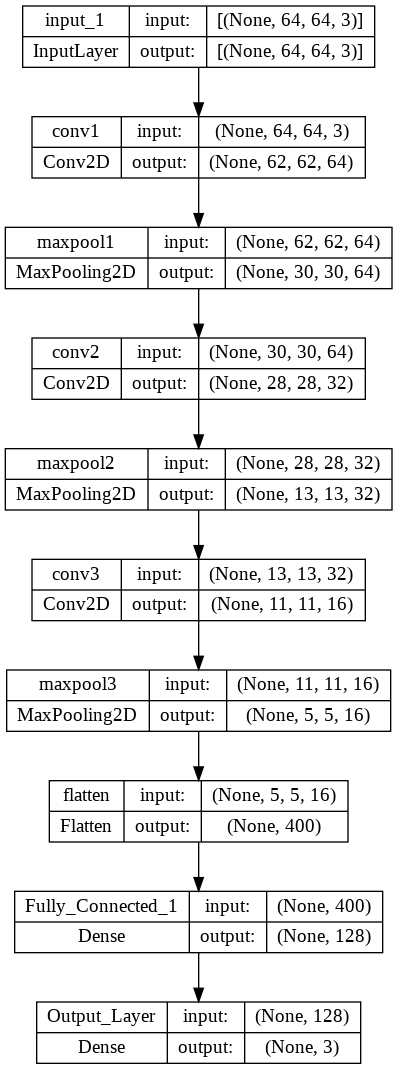

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,  show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), metrics = ['acc'])
history = model.fit(
    train_generator,
      steps_per_epoch=(2016//15),  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=(504//15))

Epoch 1/10
134/134 [==============================] - 19s 72ms/step - loss: 0.4378 - acc: 0.8081 - val_loss: 0.4673 - val_acc: 0.7919
Epoch 2/10
134/134 [==============================] - 10s 73ms/step - loss: 0.0094 - acc: 0.9980 - val_loss: 0.3414 - val_acc: 0.8465
Epoch 3/10
134/134 [==============================] - 8s 62ms/step - loss: 8.9776e-04 - acc: 1.0000 - val_loss: 0.3898 - val_acc: 0.8444
Epoch 4/10
134/134 [==============================] - 8s 63ms/step - loss: 3.9709e-04 - acc: 1.0000 - val_loss: 0.4493 - val_acc: 0.8465
Epoch 5/10
134/134 [==============================] - 8s 63ms/step - loss: 2.1943e-04 - acc: 1.0000 - val_loss: 0.4365 - val_acc: 0.8485
Epoch 6/10
134/134 [==============================] - 10s 73ms/step - loss: 1.5865e-04 - acc: 1.0000 - val_loss: 0.5331 - val_acc: 0.8424
Epoch 7/10
134/134 [==============================] - 8s 63ms/step - loss: 1.0595e-04 - acc: 1.0000 - val_loss: 0.4900 - val_acc: 0.8424
Epoch 8/10
134/134 [==========================

In [ ]:
predicted_class = model.predict(test_generator)
predicted_class = np.argmax(predicted_class, axis=1)
predicted_class

25/25 [==============================] - 1s 50ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
true_class = test_generator.labels

**TRAINING ACCURACY FOR MODEL 1**

In [ ]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix for model 1: ')

cm = confusion_matrix(true_class, predicted_class)
print(cm)

Confusion Matrix for model 1: 
[[124   0   0]
 [  2 110  12]
 [ 23  22  79]]


In [ ]:
acc = (cm[0][0] + cm[1][1] + cm[2][2]) / np.sum(cm)
print("Accuracy for Model 1 :" + str(acc))

Accuracy for Model 1 :0.8413978494623656


In [ ]:
history_dic=history.history
history_dic.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

**TRAINING AND VALIDATION PERFORMANCE OF MODEL 1**

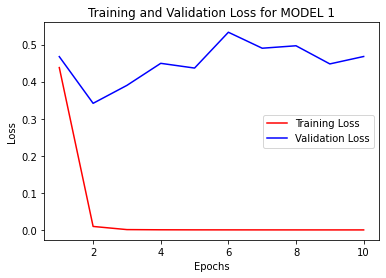

In [ ]:
import matplotlib.pyplot as plt
loss_values1=history_dic['loss']
val_loss_values1=history_dic['val_loss']

epochs=range(1, len(history_dic['loss'])+1)

plt.plot(epochs, loss_values1, 'r', label="Training Loss")
plt.plot(epochs, val_loss_values1, 'b', label="Validation Loss")
plt.title('Training and Validation Loss for MODEL 1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

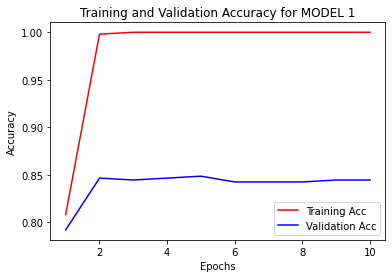

In [ ]:
acc_values1=history_dic['acc']
val_acc_loss_values1=history_dic['val_acc']


plt.plot(epochs, acc_values1, 'r', label="Training Acc")
plt.plot(epochs, val_acc_loss_values1, 'b', label="Validation Acc")
plt.title('Training and Validation Accuracy for MODEL 1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**VGG NETWORK**

Build a custom CNN model by using the pretrained VGG-16 model. Replace the fully connected layers of VGG-16 by a single fully connected layer with 128 neurons

In [ ]:
from keras.applications.vgg16 import VGG16
base_model = VGG16(input_shape=(64,64,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers
base_model.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [ ]:
modelvgg = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(name="flatten"),
    tf.keras.layers.Dense(128, activation='relu', name="fullyconnected1"),
    tf.keras.layers.Dense(3, activation="softmax", name="Output_Layer")
])
modelvgg.summary()

modelvgg.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), metrics = ['acc'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 fullyconnected1 (Dense)     (None, 128)               262272    
                                                                 
 Output_Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 14,977,347
Trainable params: 262,659
Non-trainable params: 14,714,688
_________________________________________________________________


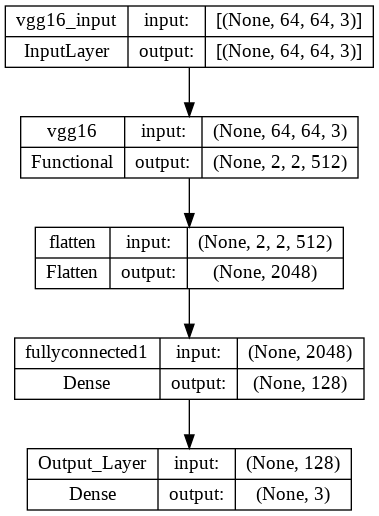

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(modelvgg,  show_shapes=True, show_layer_names=True)

In [ ]:
vgghistory = modelvgg.fit(
    train_generator,
      steps_per_epoch=(2016//15),  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator,
      validation_steps=(504//15))

Epoch 1/10
134/134 [==============================] - 12s 79ms/step - loss: 0.1407 - acc: 0.9595 - val_loss: 0.1403 - val_acc: 0.9616
Epoch 2/10
134/134 [==============================] - 9s 65ms/step - loss: 0.0079 - acc: 1.0000 - val_loss: 0.1830 - val_acc: 0.9313
Epoch 3/10
134/134 [==============================] - 9s 65ms/step - loss: 0.0033 - acc: 1.0000 - val_loss: 0.1676 - val_acc: 0.9333
Epoch 4/10
134/134 [==============================] - 9s 65ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 0.1735 - val_acc: 0.9354
Epoch 5/10
134/134 [==============================] - 9s 65ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.1721 - val_acc: 0.9354
Epoch 6/10
134/134 [==============================] - 9s 64ms/step - loss: 7.6350e-04 - acc: 1.0000 - val_loss: 0.2036 - val_acc: 0.9313
Epoch 7/10
134/134 [==============================] - 9s 66ms/step - loss: 5.5269e-04 - acc: 1.0000 - val_loss: 0.1980 - val_acc: 0.9333
Epoch 8/10
134/134 [==============================] - 9s 66m

**CONFUSION MATRIX FOR TEST DATA**

In [ ]:
predictedvgg = modelvgg.predict(test_generator)
predictedvgg = np.argmax(predictedvgg, axis=1)
predictedvgg

25/25 [==============================] - 2s 67ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
true_class = test_generator.labels
true_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix for model 2: ')

cm = confusion_matrix(true_class, predictedvgg)
print(cm)

Confusion Matrix for model 2: 
[[112  12   0]
 [  0 124   0]
 [  3   0 121]]


**TEST ACCURACY FOR VGG MODEL**

In [ ]:
acc = (cm[0][0] + cm[1][1] + cm[2][2]) / np.sum(cm)
print("Accuracy for Model 2 :" + str(acc))

Accuracy for Model 2 :0.9596774193548387


In [ ]:
vgg_history=vgghistory.history

**TRAINING AND VALIDATION FOR MODEL 2 (VGG)**

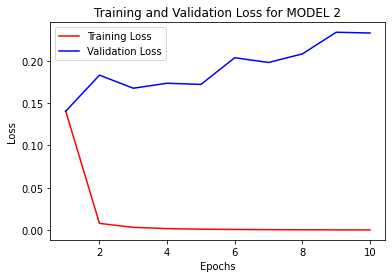

In [ ]:
vgg_history
loss_values2=vgg_history['loss']
val_loss_values2=vgg_history['val_loss']

epochs2=range(1, len(vgg_history['loss'])+1)

plt.plot(epochs2, loss_values2, 'r', label="Training Loss")
plt.plot(epochs2, val_loss_values2, 'b', label="Validation Loss")
plt.title('Training and Validation Loss for MODEL 2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

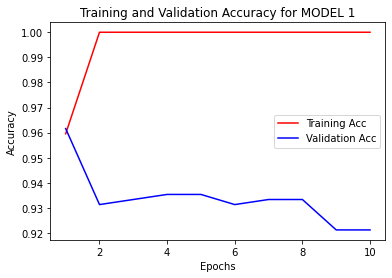

In [ ]:
acc_values2=vgg_history['acc']
val_acc_loss_values2=vgg_history['val_acc']


plt.plot(epochs, acc_values2, 'r', label="Training Acc")
plt.plot(epochs, val_acc_loss_values2, 'b', label="Validation Acc")
plt.title('Training and Validation Accuracy for MODEL 1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()